# Preprocessing

## Import libraries and raw data

In [1]:
from __future__ import annotations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.model_selection import train_test_split

In [2]:
# read data
df = utils.read_data("data/raw/pentanediol.txt").filter(regex='x|Pentan')

In [3]:
df

,x,"Pentan (20, 17.12.2021)_24mW_5s_1","Pentan (20, 17.12.2021)_24mW_5s_2","Pentan (20, 17.12.2021)_24mW_5s_3","Pentan (20, 17.12.2021)_24mW_5s_4","Pentan (20, 17.12.2021)_24mW_5s_5","Pentan (20, 17.12.2021)_24mW_5s_6","Pentan (20, 17.12.2021)_24mW_5s_7","Pentan (20, 17.12.2021)_24mW_5s_8","Pentan (20, 17.12.2021)_24mW_5s_9",...,"Pentan (100.8, 05.01.2022)_34mW_10s_1","Pentan (100.8, 05.01.2022)_34mW_10s_2","Pentan (100.8, 05.01.2022)_34mW_10s_3","Pentan (100.8, 05.01.2022)_34mW_10s_4","Pentan (100.8, 05.01.2022)_34mW_10s_5","Pentan (100.8, 05.01.2022)_34mW_10s_6","Pentan (100.8, 05.01.2022)_34mW_10s_7","Pentan (100.8, 05.01.2022)_34mW_10s_8","Pentan (100.8, 05.01.2022)_34mW_10s_9","Pentan (100.8, 05.01.2022)_34mW_10s_10"
0,498.543915,0.017714,0.017311,0.016222,0.015343,0.014983,0.017368,0.017602,0.016626,0.015761,...,0.038725,0.030044,0.031102,0.027946,0.029516,0.032570,0.024877,0.028911,0.028815,0.030029
1,498.701141,0.042098,0.043173,0.041442,0.040508,0.039267,0.041141,0.042118,0.041464,0.040876,...,0.082991,0.072329,0.070982,0.072093,0.071356,0.072510,0.072258,0.071979,0.073547,0.075077
2,498.858368,0.009608,0.010995,0.009973,0.009867,0.010995,0.011475,0.007716,0.009801,0.010396,...,0.003509,0.010709,0.010179,0.009818,0.010111,0.011379,0.009958,0.009672,0.010371,0.009721
3,499.015595,-0.005939,-0.007442,-0.008200,-0.007250,-0.005777,-0.005895,-0.006471,-0.008147,-0.008800,...,-0.018089,-0.011654,-0.008078,-0.007723,-0.009972,-0.010987,-0.009506,-0.009024,-0.008344,-0.010927
4,499.172821,-0.001753,-0.002877,-0.001950,-0.003836,-0.001767,-0.002882,-0.001372,-0.003228,-0.003214,...,-0.013810,-0.007723,-0.008168,-0.005824,-0.007665,-0.006962,-0.005911,-0.007012,-0.007463,-0.006381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,1107.405518,-0.057630,-0.060317,-0.059881,-0.058423,-0.058355,-0.059003,-0.058828,-0.058223,-0.058698,...,-0.064517,-0.078288,-0.078032,-0.079514,-0.078974,-0.079332,-0.079537,-0.077367,-0.079431,-0.079970
3644,1107.576782,-0.059668,-0.061160,-0.058839,-0.059997,-0.058421,-0.059158,-0.059005,-0.060305,-0.060516,...,-0.065319,-0.080367,-0.080585,-0.080464,-0.082751,-0.082724,-0.080599,-0.080261,-0.081985,-0.081779
3645,1107.748169,-0.058627,-0.058367,-0.060058,-0.060906,-0.058554,-0.057408,-0.059981,-0.058267,-0.059208,...,-0.064851,-0.078447,-0.079049,-0.079627,-0.080557,-0.079671,-0.079175,-0.080125,-0.079476,-0.080083
3646,1107.919434,-0.059269,-0.061647,-0.059969,-0.060219,-0.059729,-0.059845,-0.060446,-0.059729,-0.059430,...,-0.064673,-0.079734,-0.081466,-0.079379,-0.081959,-0.081774,-0.082317,-0.080442,-0.081058,-0.081168


## Trimming & Smoothing

In [4]:
# preprocessing parameters
lambda0 = 522
rs_min = 0
rs_max = 3000

In [5]:
# transform x-axis from wavelength to ramanshift ----
df = utils.wavelength2ramanshift(df, ref=lambda0, x='x')
# trim signals to region of interest: interval + bell ----
df = utils.trim_data(df, 'x', low=rs_min, high=rs_max)
# smooth data ----
df = utils.smooth_data(df)
# retirve x-axis ramanshift ----
x = df.x

In [6]:
df

,x,"Pentan (20, 17.12.2021)_24mW_5s_1","Pentan (20, 17.12.2021)_24mW_5s_2","Pentan (20, 17.12.2021)_24mW_5s_3","Pentan (20, 17.12.2021)_24mW_5s_4","Pentan (20, 17.12.2021)_24mW_5s_5","Pentan (20, 17.12.2021)_24mW_5s_6","Pentan (20, 17.12.2021)_24mW_5s_7","Pentan (20, 17.12.2021)_24mW_5s_8","Pentan (20, 17.12.2021)_24mW_5s_9",...,"Pentan (100.8, 05.01.2022)_34mW_10s_1","Pentan (100.8, 05.01.2022)_34mW_10s_2","Pentan (100.8, 05.01.2022)_34mW_10s_3","Pentan (100.8, 05.01.2022)_34mW_10s_4","Pentan (100.8, 05.01.2022)_34mW_10s_5","Pentan (100.8, 05.01.2022)_34mW_10s_6","Pentan (100.8, 05.01.2022)_34mW_10s_7","Pentan (100.8, 05.01.2022)_34mW_10s_8","Pentan (100.8, 05.01.2022)_34mW_10s_9","Pentan (100.8, 05.01.2022)_34mW_10s_10"
0,2.282240,0.015158,0.014879,0.015303,0.014939,0.014018,0.015251,0.013842,0.016571,0.015079,...,0.020013,0.021760,0.021413,0.020914,0.018842,0.019157,0.020550,0.019073,0.019902,0.020054
1,8.094012,0.014641,0.014465,0.014615,0.014428,0.014827,0.015231,0.014760,0.014898,0.014575,...,0.025511,0.023288,0.022654,0.023435,0.020305,0.021669,0.022207,0.022443,0.022036,0.022272
2,13.902258,0.012291,0.011992,0.012144,0.011964,0.013020,0.012922,0.012875,0.011963,0.012186,...,0.023388,0.020370,0.019522,0.020805,0.017604,0.019284,0.019329,0.020706,0.019458,0.019706
3,19.709216,0.009201,0.008708,0.008960,0.008687,0.009970,0.009616,0.009657,0.008638,0.009013,...,0.017255,0.015273,0.014364,0.015614,0.012931,0.014487,0.014299,0.016293,0.014602,0.014790
4,25.510416,0.006152,0.005502,0.005835,0.005422,0.006683,0.006247,0.006186,0.005547,0.005854,...,0.009800,0.009667,0.008888,0.009773,0.007882,0.009099,0.008856,0.011015,0.009244,0.009309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2980.975435,0.059573,0.066438,0.066313,0.069169,0.069389,0.066097,0.069446,0.070771,0.069405,...,0.237328,0.227246,0.233262,0.225949,0.232048,0.229591,0.239668,0.235955,0.232414,0.236930
599,2985.238532,0.057060,0.064257,0.064723,0.067124,0.067852,0.064040,0.067826,0.068917,0.066970,...,0.229630,0.220134,0.224979,0.218188,0.225088,0.222702,0.233299,0.229482,0.225635,0.230453
600,2989.497786,0.054078,0.061876,0.063014,0.064809,0.065861,0.061723,0.066062,0.066965,0.064226,...,0.221144,0.212215,0.216896,0.209917,0.217504,0.214827,0.226287,0.221804,0.218639,0.223031
601,2993.754797,0.051456,0.060169,0.061875,0.063074,0.064039,0.059903,0.065022,0.065821,0.062077,...,0.213251,0.204344,0.210918,0.202667,0.210404,0.206780,0.219454,0.213529,0.212576,0.215404


In [7]:
df_info = utils.extract_info(list(df.drop(columns='x').columns))

# # save info dataframe to csv
# df_info.to_csv('data/preprocessed/df_info.csv')

In [8]:
df_info

,subst,c,date,power,it,run
0,Pentan,20.0,17.12.2021,24.0,5.0,1
1,Pentan,20.0,17.12.2021,24.0,5.0,2
2,Pentan,20.0,17.12.2021,24.0,5.0,3
3,Pentan,20.0,17.12.2021,24.0,5.0,4
4,Pentan,20.0,17.12.2021,24.0,5.0,5
...,...,...,...,...,...,...
316,Pentan,100.8,05.01.2022,34.0,10.0,6
317,Pentan,100.8,05.01.2022,34.0,10.0,7
318,Pentan,100.8,05.01.2022,34.0,10.0,8
319,Pentan,100.8,05.01.2022,34.0,10.0,9


## Split data

### First Split: Stratified Train Test Split

In [9]:
# First Split: split into train and test subsets (stratified, based on concentration) -----
df_sp = df.drop(columns='x').transpose(copy=True).reset_index(drop=True)
df_sp_train, df_sp_test, df_info_train, df_info_test = train_test_split(df_sp, df_info, test_size=0.2, random_state=0, stratify=df_info['c'])
y_train, y_test = df_info_train[['c']], df_info_test[['c']]

# # save train and test info dataframes to csv
# df_info_train.to_csv('data/preprocessed/df_info_train.csv')
# df_info_test.to_csv('data/preprocessed/df_info_test.csv')

### Second Split: split signals into two (interval and bell)

In [10]:
low1, high1 = 0, 2800
low2, high2 = 2800, 3000

df_sp_train_1 = df_sp_train.loc[:,(x >= low1) & (x < high1)]
df_sp_train_2 = df_sp_train.loc[:,(x >= low2) & (x < high2)]

df_sp_test_1 = df_sp_test.loc[:,(x >= low1) & (x < high1)]
df_sp_test_2 = df_sp_test.loc[:,(x >= low2) & (x < high2)]

#### plot train and test signals from both intervals

In [11]:
plot_params = {'xlabel':"Raman Shift $[cm^{-1}]$", 
               'ylabel':"Intensity", 
               'grid':'both', 
               'figsize':(14,8), 
               'legend':None}

<AxesSubplot:title={'center':'Test set, second interval'}, xlabel='Raman Shift $[cm^{-1}]$', ylabel='Intensity'>

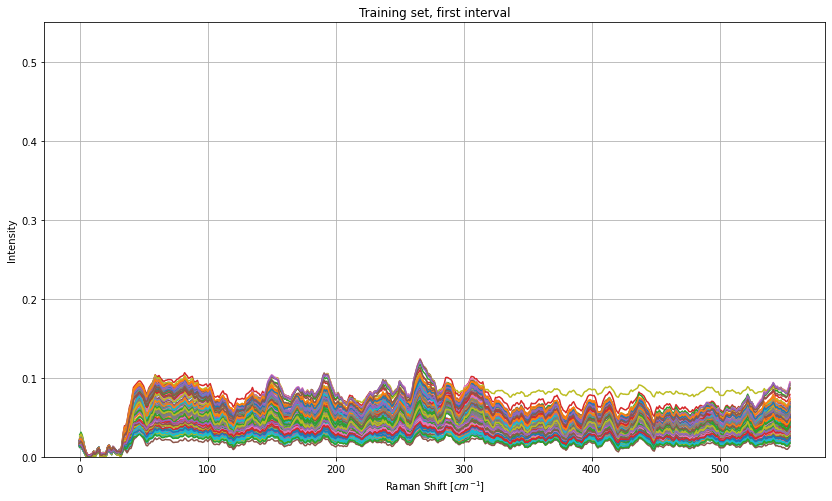

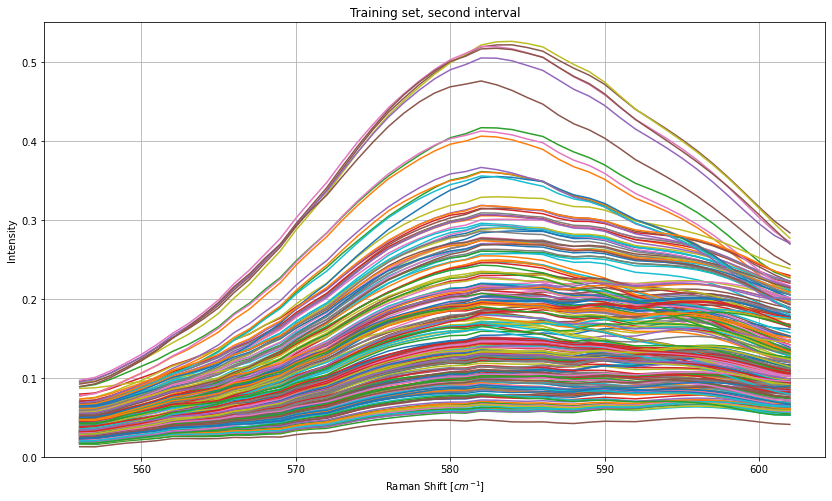

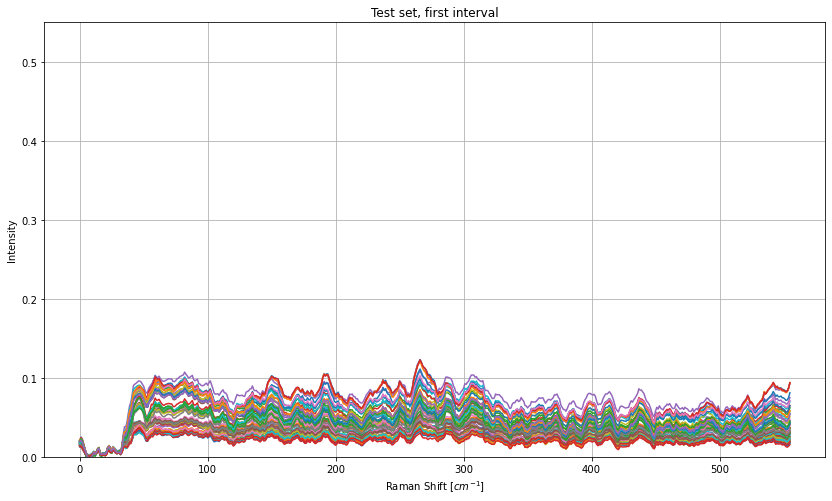

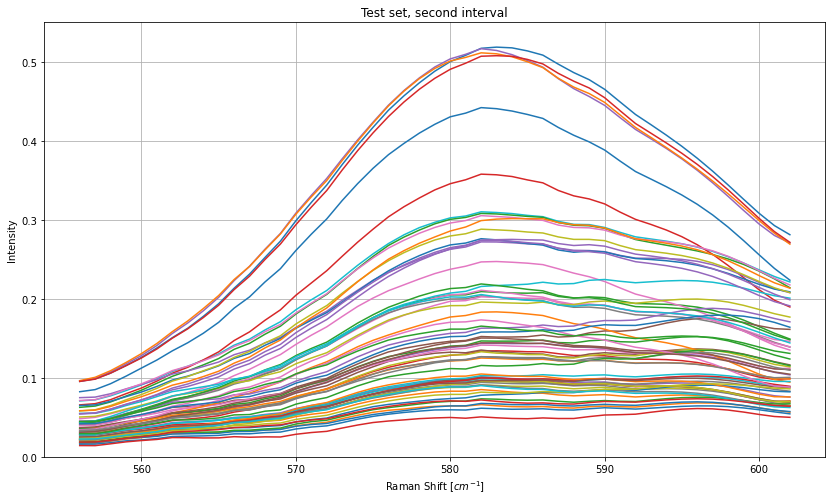

In [12]:
# plot to check -----
df_sp_train_1.T.plot(**plot_params, title='Training set, first interval', ylim=(0,0.55))
df_sp_train_2.T.plot(**plot_params, title='Training set, second interval', ylim=(0,0.55))

df_sp_test_1.T.plot(**plot_params, title='Test set, first interval', ylim=(0,0.55))
df_sp_test_2.T.plot(**plot_params, title='Test set, second interval', ylim=(0,0.55))

## Feature Extraction

### Summary of features to extract

In [13]:
import tsfel

# get description of features to extract from tsfel config ----
cfg = tsfel.get_features_by_domain()
# spectral features
desc_feat_sp = pd.DataFrame(cfg['spectral']).T
desc_feat_sp.insert(loc=0, column='type', value='spectral')
# statistical features
desc_feat_st = pd.DataFrame(cfg['statistical']).T
desc_feat_st.insert(loc=0, column='type', value='statistical')
# temporal features
desc_feat_te = pd.DataFrame(cfg['temporal']).T
desc_feat_te.insert(loc=0, column='type', value='temporal')
# all
desc_feat = pd.concat([desc_feat_sp, desc_feat_st, desc_feat_te])

In [14]:
desc_feat

,type,complexity,description,function,parameters,n_features,use,tag
FFT mean coefficient,spectral,constant,Computes the mean value of each spectrogram fr...,tsfel.fft_mean_coeff,"{'fs': 100, 'nfreq': 256}",nfreq,yes,NaN
Fundamental frequency,spectral,log,Computes the fundamental frequency.,tsfel.fundamental_frequency,{'fs': 100},1,yes,NaN
Human range energy,spectral,log,Computes the human range energy ratio given by...,tsfel.human_range_energy,{'fs': 100},1,yes,inertial
LPCC,spectral,log,Computes the linear prediction cepstral coeffi...,tsfel.lpcc,{'n_coeff': 12},n_coeff,yes,audio
MFCC,spectral,constant,Computes the MEL cepstral coefficients.,tsfel.mfcc,"{'cep_lifter': 22, 'fs': 100, 'nfft': 512, 'nf...",num_ceps,yes,"[audio, emg]"
Max power spectrum,spectral,log,Computes the maximum power spectrum density.,tsfel.max_power_spectrum,{'fs': 100},1,yes,NaN
Maximum frequency,spectral,log,Computes the maximum frequency.,tsfel.max_frequency,{'fs': 100},1,yes,NaN
Median frequency,spectral,log,Computes the median frequency.,tsfel.median_frequency,{'fs': 100},1,yes,NaN
Power bandwidth,spectral,log,Computes power spectrum density bandwidth of t...,tsfel.power_bandwidth,{'fs': 100},1,yes,NaN
Spectral centroid,spectral,linear,Computes the barycenter of the spectrum.,tsfel.spectral_centroid,{'fs': 100},1,yes,audio


### Extract features

In [15]:
def extract_features(df: pd.DataFrame, domain: str = None) -> pd.DataFrmae:  
    """
    Extract features from DataFrame containing signals.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame of shape [n_signals, n_values] containing signals.
    domain : str, optional
        Available domains: "statistical"; "spectral"; "temporal".
        If domain equals None, then the features settings from all
        domains are returned. The default is None.

    Returns
    -------
    X : pd.DataFrame
        Feature DataFrame od shape [n_signals, n_features].

    """
    cfg_file = tsfel.get_features_by_domain(domain)
    X = pd.concat([tsfel.time_series_features_extractor(cfg_file, df.iloc[i,:].values, verbose=0) for i in range(df.shape[0])])
    assert df.shape[0] == X.shape[0]
    return X

In [16]:
# get features for interval 1 -----
X_train_1 = extract_features(df_sp_train_1)
X_test_1 = extract_features(df_sp_test_1)

# get features for interval 2 -----
X_train_2 = extract_features(df_sp_train_2)
X_test_2 = extract_features(df_sp_test_2)

<ipython-input-15-7c6517060a8d>:21: UserWarning: Using default sampling frequency set in configuration file.
  X = pd.concat([tsfel.time_series_features_extractor(cfg_file, df.iloc[i,:].values, verbose=0) for i in range(df.shape[0])])


## Feature Selection

### Remove highly correlated features

In [17]:
# Detect highly correlated features -----
corr_features_1 = tsfel.correlated_features(X_train_1)
corr_features_2 = tsfel.correlated_features(X_train_2)

In [18]:
# Remove highly correlated features -----
X_train_1.drop(corr_features_1, axis=1, inplace=True)
X_test_1.drop(corr_features_1, axis=1, inplace=True)

X_train_2.drop(corr_features_2, axis=1, inplace=True)
X_test_2.drop(corr_features_2, axis=1, inplace=True)

### Remove low variance features

In [19]:
# Remove low variance features -----
from sklearn.feature_selection import VarianceThreshold
def remove_low_var_features(X_train: pd.DataFrame, X_test: pd.DataFrame, threshold: float = 0.) -> tuple:
    """
    Performs feature selection by removing low variance features
    from training and test feature matrices.

    Parameters
    ----------
    X_train : pd.DataFrame
        Training feature matrix of shape [n_signals, n_features].
    X_test : pd.DataFrame
        Test feature matrix of shape [n_signals, n_features].
    threshold : float
        Features with a training-set variance lower than this threshold will be removed.

    Returns
    -------
    Tuple
        The training and test feature matrices with only the selected features.

    """
    columns = X_train.columns
    selector = VarianceThreshold(threshold).fit(X_train)    
    selected_features = selector.get_support(indices=True)
    X_train_lv = pd.DataFrame(data=selector.transform(X_train), columns=columns[selected_features])
    X_test_lv = pd.DataFrame(data=selector.transform(X_test), columns=columns[selected_features])
    return X_train_lv, X_test_lv

In [20]:
X_train_1, X_test_1 = remove_low_var_features(X_train_1, X_test_1)
X_train_2, X_test_2 = remove_low_var_features(X_train_2, X_test_2)

In [21]:
# concatenate features from interval 1 and 2 together with it and power -----
df_setup_train = df_info_train[['power', 'it']].reset_index(drop=True)
X_train = pd.concat([df_setup_train, X_train_1, X_train_2], axis=1, ignore_index=False)

df_setup_test = df_info_test[['power', 'it']].reset_index(drop=True)
X_test = pd.concat([df_setup_test, X_test_1, X_test_2], axis=1)

## Normalize Features

In [22]:
# Normalizing Features -----
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

columns_train = X_train.columns
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=columns_train)

columns_test = X_test.columns
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=columns_test)

In [23]:
X_train

,power,it,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_5,0_FFT mean coefficient_9,0_FFT mean coefficient_10,0_FFT mean coefficient_11,...,0_Spectral positive turning points,0_Spectral variation,0_Wavelet entropy,0_Histogram_5,0_Histogram_6,0_Histogram_7,0_Kurtosis,0_Skewness,0_Negative turning points,0_Neighbourhood peaks
0,-1.0,1.0,-0.227264,0.337526,-0.030038,0.546800,0.225391,2.148856,0.830994,0.729933,...,-0.425125,-0.979456,-0.308934,0.043930,-0.002060,-0.172252,-0.991664,0.570699,-0.130732,0.57735
1,-1.0,-1.0,-0.991609,-0.746321,-0.821340,-0.975596,-0.938788,-0.770893,-1.056727,-0.754690,...,-0.425125,-0.852915,-0.276269,0.614382,-0.617409,-0.172252,-0.226935,0.304959,-0.130732,0.57735
2,1.0,-1.0,-0.693258,-0.817085,-0.528957,-0.700616,-0.803603,-0.858991,-0.887075,-0.924248,...,-0.425125,0.767603,0.900415,0.614382,-0.617409,-0.172252,-1.046792,-0.394382,0.417914,0.57735
3,1.0,-1.0,-0.832638,-0.403949,-0.614285,-0.542280,-0.616382,-0.529720,-0.776498,-0.500365,...,-0.425125,-0.721634,-0.183225,0.614382,-0.617409,-0.172252,-0.284733,0.074395,0.417914,0.57735
4,-1.0,1.0,0.337228,-0.034940,-0.445764,0.030626,0.128068,-0.206418,0.107966,0.161476,...,-0.425125,-0.644935,-0.622062,0.614382,-0.617409,-0.172252,0.931089,-0.806129,-0.679377,0.57735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.0,1.0,2.165973,0.952291,0.974289,1.675339,1.640663,0.970275,1.551632,1.370112,...,-0.425125,-0.713187,-0.662543,-1.993400,2.195614,-0.172252,0.880658,-0.682356,-1.228023,0.57735
252,-1.0,-1.0,-1.089309,-0.905015,-0.957163,-1.130549,-1.024165,-0.685683,-1.155639,-0.938939,...,-0.425125,-0.530212,-0.197094,0.614382,-0.617409,-0.172252,1.565336,-0.638997,0.417914,0.57735
253,1.0,-1.0,-0.763321,-0.335421,-0.627889,-0.404592,-0.570640,-0.689836,-0.655157,-0.528237,...,-0.425125,-0.646929,-0.409816,0.614382,-0.617409,-0.172252,0.311292,-0.151865,-0.679377,0.57735
254,1.0,-1.0,-0.469037,-0.691718,-0.741802,-0.727899,-0.677363,-1.055473,-0.742098,-0.917426,...,-0.425125,-0.295870,0.086874,0.614382,-0.617409,-0.172252,0.022005,-0.329503,-0.130732,0.57735


In [24]:
X_test

,power,it,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_5,0_FFT mean coefficient_9,0_FFT mean coefficient_10,0_FFT mean coefficient_11,...,0_Spectral positive turning points,0_Spectral variation,0_Wavelet entropy,0_Histogram_5,0_Histogram_6,0_Histogram_7,0_Kurtosis,0_Skewness,0_Negative turning points,0_Neighbourhood peaks
0,1.0,1.0,2.334638,3.418295,0.126021,1.520192,3.326167,3.457861,2.068776,3.710572,...,-0.425125,-0.982233,-1.649559,-2.400865,0.877009,6.509021,0.373041,1.826679,-1.228023,0.577350
1,-1.0,-1.0,-0.994151,-0.959557,-0.814346,-1.045442,-1.054106,-1.089347,-1.053571,-0.902697,...,-0.425125,1.686989,1.440099,0.614382,-0.617409,-0.172252,0.220116,-1.000747,0.966559,0.577350
2,-1.0,1.0,-0.202307,0.372240,-0.028134,0.569860,0.353232,0.291110,1.011256,0.322386,...,-0.425125,-0.642480,-0.549279,-0.363536,0.437475,-0.172252,1.034356,-1.088273,-0.130732,0.577350
3,-1.0,-1.0,-0.987940,-0.759094,-0.868566,-1.040299,-0.910068,-0.944868,-1.119242,-0.973814,...,-0.425125,-0.544807,-0.396326,0.614382,-0.617409,-0.172252,1.278348,-0.588881,0.966559,0.577350
4,-1.0,-1.0,-0.517619,-0.558002,-0.980339,-0.933046,-0.920650,-0.813858,-1.015620,-1.036279,...,-0.425125,-0.023024,0.431551,0.614382,-0.617409,-0.172252,0.446104,-0.579543,-0.130732,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1.0,1.0,0.405131,1.399459,2.368465,1.919850,0.976515,-0.000114,1.216234,-0.245165,...,1.940787,1.706234,0.958506,0.614382,-0.617409,-0.172252,-1.445892,0.730834,0.417914,-1.732051
61,1.0,1.0,0.830768,2.609685,1.471409,2.548006,1.755842,1.724598,2.119132,1.532892,...,-0.425125,-0.867328,-0.589923,-1.830413,2.019800,-0.172252,-0.159282,0.052329,-1.228023,0.577350
62,-1.0,1.0,0.433365,-0.208652,-0.534283,-0.139816,-0.053049,-0.127390,0.060418,0.124060,...,-0.425125,0.212331,-0.170007,0.614382,-0.617409,-0.172252,1.827252,-1.741877,0.417914,0.577350
63,-1.0,-1.0,-0.973315,-0.950852,-0.741209,-0.963335,-1.012294,-0.981577,-1.045908,-0.842124,...,-0.425125,2.098280,0.898557,0.614382,-0.617409,-0.172252,1.274861,-1.599692,0.966559,0.577350


## Select best features

### Encode labels

In [25]:
from sklearn.preprocessing import LabelEncoder

# prepare target and return encoded training and testig data
def prepare_targets(y_train, y_test):
    
    letrain = LabelEncoder()
    letest = LabelEncoder()
    
    letrain.fit(y_train)
    letest.fit(y_test)
    
    y_train_enc = letrain.transform(y_train)
    y_test_enc = letest.transform(y_test)
    
    return y_train_enc, y_test_enc

In [26]:
y_train_enc, y_test_enc = prepare_targets(y_train.values.ravel(), y_test.values.ravel())
# print(y_train_enc)

### Recursive Feature Elimination

In [27]:
# from sklearn.feature_selection import RFE

# # report which features were selected by RFE
# # define RFE
# rfe = RFE(estimator= RandomForestRegressor(), n_features_to_select=15)
# # fit RFE
# rfe.fit( X_test, y_test_enc)
# # summarize all features
# for i in range( X_test.shape[1]):
#     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

# X_train = rfe.transform(X_train)
# X_test = rfe.transform(X_test)

### Mutual Info Regression

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_test, K):
    fs = SelectKBest(score_func=mutual_info_regression, k=K) # mutual_info_regression
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [29]:
X_train, X_test, fs = select_features(X_train, y_train_enc, X_test, 20)

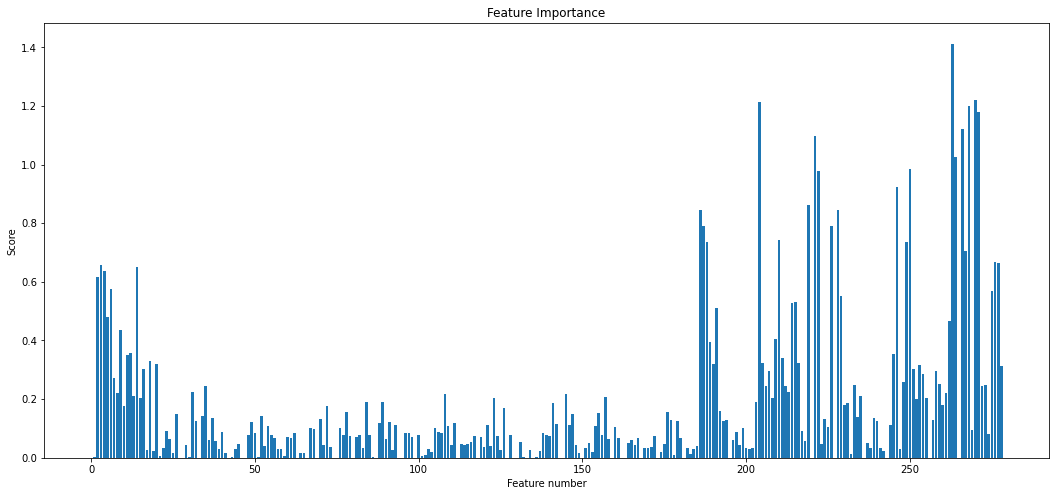

In [30]:
# print feature scores
plt.figure(figsize=(18,8))
plt.title('Feature Importance')
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Feature number')
plt.ylabel('Score')
plt.show()

## Save preprocessed data as csv

In [31]:
# # save ----
# from pathlib import Path
# pd.DataFrame(X_train).to_csv(Path('data/preprocessed/X_train.csv'), index=False)
# pd.DataFrame(X_test).to_csv(Path('data/preprocessed/X_test.csv'), index=False)
# y_train.to_csv(Path('data/preprocessed/y_train_.csv'), index=False)
# y_test.to_csv(Path('data/preprocessed/y_test.csv'), index=False)

In [32]:
# # check validity of saved csv files ----
# X_train_imp = pd.read_csv(Path('data/preprocessed/X_train.csv'))
# X_test_imp = pd.read_csv(Path('data/preprocessed/X_test.csv'))
# y_train_imp = pd.read_csv(Path('data/preprocessed/y_train.csv'))
# y_test_imp = pd.read_csv(Path('data/preprocessed/y_test.csv'))

# assert np.allclose(X_train.values, X_train_imp.values)
# assert np.allclose(X_test.values, X_test_imp.values)
# assert np.allclose(y_train.values, y_train_imp.values)
# assert np.allclose(y_test.values, y_test_imp.values)